In [1]:
from shapely.geometry import Point, mapping, LineString
import geopandas as gpd
import pandas as pd
import folium
from folium import PolyLine
from folium.plugins import MarkerCluster, Fullscreen
from folium.features import CustomIcon
from branca.element import MacroElement
from jinja2 import Template
import matplotlib.cm as cm
import matplotlib.colors as colors
import numpy as np
from folium.features import GeoJsonTooltip
from folium.features import GeoJson
from shapely import wkt
import matplotlib.pyplot as plt

In [2]:
from pyproj import CRS

In [3]:
snapkids2019_df = pd.read_csv('B22002_2019_SNAP_children_under_18.csv')

In [4]:
#want to drop column with the word 'Margin' 
columns_to_drop = [col for col in snapkids2019_df.columns if 'Margin' in str(col)]

In [5]:
snapkids2019_df.drop(columns=columns_to_drop, inplace=True)

In [6]:
# delete '!!Estimate' from the column names
snapkids2019_df.columns = snapkids2019_df.columns.str.replace('!!Estimate', '')

In [7]:
# delete ',west virginia' after county name
snapkids2019_df.columns = snapkids2019_df.columns.str.replace(', West Virginia', '')

In [8]:
#this was a big one. had to come back after 50 lines of code to fix it. realized late that there were two rows 
#with the same sub-discription 
snapkids2019_df.loc[2, "Label (Grouping)"] = "SNAP children under 18"

In [9]:
#want to make a dataset over 5 years so have to move headers to rows 
df_melted = snapkids2019_df.melt(id_vars=[snapkids2019_df.columns[0]], var_name='County', value_name = '2019')

In [10]:
snapkids2019_df = df_melted

In [11]:
snapkids2020_df = pd.read_csv('B22002_2020_SNAP_children_under_18.csv')

In [12]:
columns_to_drop = [col for col in snapkids2020_df.columns if 'Margin' in str(col)]

In [13]:
snapkids2020_df.drop(columns=columns_to_drop, inplace=True)

In [14]:
snapkids2020_df.columns = snapkids2020_df.columns.str.replace('!!Estimate', '')

In [15]:
snapkids2020_df.columns = snapkids2020_df.columns.str.replace(', West Virginia', '')

In [16]:
snapkids2020_df.loc[2, "Label (Grouping)"] = "SNAP children under 18"

In [17]:
snapkids2020_df = snapkids2020_df.melt(id_vars=[snapkids2020_df.columns[0]], var_name='County', value_name = '2020')

In [18]:
snapkids2021_df = pd.read_csv('B22002_2021_SNAP_children_under_18.csv')

In [19]:
columns_to_drop = [col for col in snapkids2021_df.columns if 'Margin' in str(col)]

In [20]:
snapkids2021_df.drop(columns=columns_to_drop, inplace=True)

In [21]:
snapkids2021_df.columns = snapkids2021_df.columns.str.replace('!!Estimate', '')

In [22]:
snapkids2021_df.columns = snapkids2021_df.columns.str.replace(', West Virginia', '')

In [23]:
snapkids2021_df.loc[2, "Label (Grouping)"] = "SNAP children under 18"

In [24]:
snapkids2021_df = snapkids2021_df.melt(id_vars=[snapkids2021_df.columns[0]], var_name='County', value_name = '2021')

In [25]:
snapkids2022_df = pd.read_csv('B22002_2022_SNAP_children_under_18.csv')

In [26]:
columns_to_drop = [col for col in snapkids2022_df.columns if 'Margin' in str(col)]

In [27]:
snapkids2022_df.drop(columns=columns_to_drop, inplace=True)

In [28]:
snapkids2022_df.columns = snapkids2022_df.columns.str.replace('!!Estimate', '')

In [29]:
snapkids2022_df.columns = snapkids2022_df.columns.str.replace(', West Virginia', '')

In [30]:
snapkids2022_df.loc[2, "Label (Grouping)"] = "SNAP children under 18"

In [31]:
snapkids2022_df = snapkids2022_df.melt(id_vars=[snapkids2022_df.columns[0]], var_name='County', value_name = '2022')

In [32]:
snapkids2023_df = pd.read_csv('B22002_2023_SNAP_children_under_18.csv')

In [33]:
columns_to_drop = [col for col in snapkids2023_df.columns if 'Margin' in str(col)]

In [34]:
snapkids2023_df.drop(columns=columns_to_drop, inplace=True)

In [35]:
snapkids2023_df.columns = snapkids2023_df.columns.str.replace('!!Estimate', '')

In [36]:
snapkids2023_df.columns = snapkids2023_df.columns.str.replace(', West Virginia', '')

In [37]:
snapkids2023_df.loc[2, "Label (Grouping)"] = "SNAP children under 18"

In [38]:
snapkids2023_df = snapkids2023_df.melt(id_vars=[snapkids2023_df.columns[0]], var_name='County', value_name = '2023')

In [39]:
#followed the process above for all my data to get into a their own years respectively 
#then merged below
dfs = [snapkids2019_df, snapkids2020_df, snapkids2021_df, snapkids2022_df, snapkids2023_df]

In [40]:
merged_df = dfs[0]

In [41]:
for i, df in enumerate(dfs):
    dfs[i] = df.set_index(['Label (Grouping)', 'County'])

In [42]:
merged_df = pd.concat(dfs, axis=1)

In [43]:
merged_df = merged_df.reset_index()

In [44]:
snapkids_df = merged_df

In [45]:
snapkids_df.head()

,Label (Grouping),County,2019,2020,2021,2022,2023
0,Total:,West Virginia,"732,585","734,235","711,352","716,040","721,448"
1,Household received Food Stamps/SNAP in the...,West Virginia,"123,277","121,292","116,700","119,104","123,756"
2,SNAP children under 18,West Virginia,"54,661","53,390","50,043","50,652","52,595"
3,Married-couple family,West Virginia,"20,399","20,175","19,193","19,772","20,830"
4,Other family:,West Virginia,"33,251","32,161","29,975","29,979","31,062"


In [46]:
#cleaning the label(grouping) column
print(snapkids_df['Label (Grouping)'].unique())

['Total:'
 '\xa0\xa0\xa0\xa0Household received Food Stamps/SNAP in the past 12 months:'
 'SNAP children under 18'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Married-couple family'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Other family:'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Male householder, no spouse present'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Female householder, no spouse present'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0Nonfamily households'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0No children under 18 years:'
 '\xa0\xa0\xa0\xa0Household did not receive Food Stamps/SNAP in the past 12 months:'
 '\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0With children under 18 years:']


In [47]:
snapkids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Label (Grouping)  1512 non-null   object
 1   County            1512 non-null   object
 2   2019              1512 non-null   object
 3   2020              1512 non-null   object
 4   2021              1512 non-null   object
 5   2022              1512 non-null   object
 6   2023              1512 non-null   object
dtypes: object(7)
memory usage: 82.8+ KB


In [48]:
#cleaned only columns with object (string) types
str_cols = snapkids_df.select_dtypes(include='object').columns

In [49]:
#cleaned and normalized whitespace in each string column 
for col in str_cols:
    snapkids_df[col] = snapkids_df[col].astype(str).apply(lambda x: ' '.join(x.split()))

In [50]:
#cleaned column whitespaces
snapkids_df.columns = snapkids_df.columns.str.strip()

In [51]:
#checked data
print(snapkids_df['Label (Grouping)'].unique())

['Total:' 'Household received Food Stamps/SNAP in the past 12 months:'
 'SNAP children under 18' 'Married-couple family' 'Other family:'
 'Male householder, no spouse present'
 'Female householder, no spouse present' 'Nonfamily households'
 'No children under 18 years:'
 'Household did not receive Food Stamps/SNAP in the past 12 months:'
 'With children under 18 years:']


In [52]:
#want to make a visualization of my data and realized that i need to clean up my comma's and convert obj to int
for col in ['2019', '2020', '2021', '2022', '2023']:
    snapkids_df[col] = snapkids_df[col].replace({',': ''}, regex=True).astype(int)

In [53]:
snapkids_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1512 entries, 0 to 1511
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Label (Grouping)  1512 non-null   object
 1   County            1512 non-null   object
 2   2019              1512 non-null   int32 
 3   2020              1512 non-null   int32 
 4   2021              1512 non-null   int32 
 5   2022              1512 non-null   int32 
 6   2023              1512 non-null   int32 
dtypes: int32(5), object(2)
memory usage: 53.3+ KB


In [54]:
#filtered for data on kids under 18 and realized i have two rows 
#first row is kids under 18 from  Household that received Food Stamps/SNAP in the past 12 months:
row = snapkids_df[
    snapkids_df['Label (Grouping)'].str.contains("SNAP children under 18", case=False, na=False) &
    (snapkids_df['County'] == 'West Virginia')
]
row

,Label (Grouping),County,2019,2020,2021,2022,2023
2,SNAP children under 18,West Virginia,54661,53390,50043,50652,52595


In [55]:
years = ['2019', '2020', '2021', '2022', '2023']
values = row[years].values.flatten().astype(int)

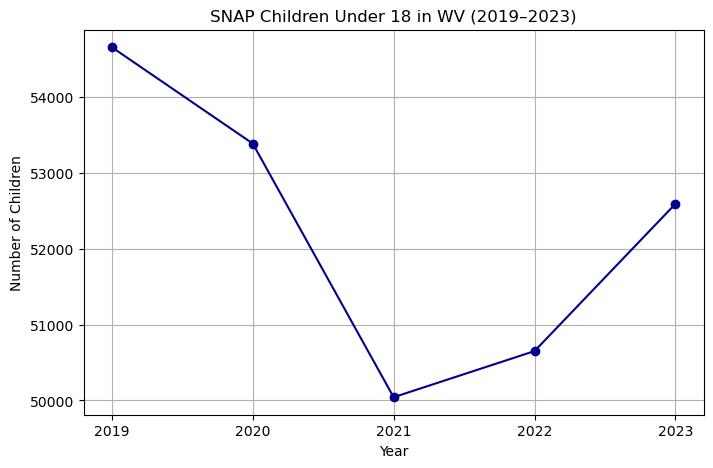

In [56]:
plt.figure(figsize=(8, 5))
plt.plot(years, values, marker='o', color='darkblue')
plt.title("SNAP Children Under 18 in WV (2019–2023)")
plt.xlabel("Year")
plt.ylabel("Number of Children")
plt.grid(True)

In [57]:
snapkids_df.head(50)

,Label (Grouping),County,2019,2020,2021,2022,2023
0,Total:,West Virginia,732585,734235,711352,716040,721448
1,Household received Food Stamps/SNAP in the pas...,West Virginia,123277,121292,116700,119104,123756
2,SNAP children under 18,West Virginia,54661,53390,50043,50652,52595
3,Married-couple family,West Virginia,20399,20175,19193,19772,20830
4,Other family:,West Virginia,33251,32161,29975,29979,31062
5,"Male householder, no spouse present",West Virginia,7170,6955,6035,5980,6624
6,"Female householder, no spouse present",West Virginia,26081,25206,23940,23999,24438
7,Nonfamily households,West Virginia,1011,1054,875,901,703
8,No children under 18 years:,West Virginia,68616,67902,66657,68452,71161
9,Married-couple family,West Virginia,13532,12849,12020,12114,12704


In [59]:
row

,Label (Grouping),County,2019,2020,2021,2022,2023
2,SNAP children under 18,West Virginia,54661,53390,50043,50652,52595


In [118]:
rowkids = row

In [120]:
rowkids

,Label (Grouping),County,2019,2020,2021,2022,2023
2,SNAP children under 18,West Virginia,54661,53390,50043,50652,52595


In [122]:
rowkids.to_csv('rowkids.csv', index=False)